A series of tests of the SLIP package.

In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
fig_width = 12
figsize=(fig_width, .618*fig_width)
fopts = {'fontsize':18}
opts= {'cmap': plt.cm.gray, 'vmin':-1., 'vmax':1., 'interpolation':'nearest', 'origin':'upper'}

In [2]:
from SLIP import Image

## initializing the SLIP object

The SLIP object may be initialized by giving some parameters. These could be given using 

- a dictionary

In [3]:
im = Image()  # default is {'N_X':128, 'N_Y':128}
print(im.pe)

{'N_Y': 128, 'N_X': 128}


In [4]:
im = Image({'N_X':128, 'N_Y':128})

- a string indicating the path of a file containing a dictionary

In [5]:
im = Image('file://default_param.py')
im = Image('default_param.py')
print(im.pe.keys())

dict_keys(['white_N_0', 'white_n_learning', 'figpath', 'N_image', 'seed', 'white_alpha', 'white_steepness', 'do_mask', 'N_X', 'matpath', 'white_N', 'white_recompute', 'N_Y', 'white_name_database', 'ext', 'datapath', 'white_f_0'])


- a string indicating the URL of a file containing a dictionary

In [6]:
im = Image('https://raw.githubusercontent.com/meduz/SLIP/master/default_param.py')
print(im.pe.keys())

dict_keys(['white_N_0', 'white_n_learning', 'figpath', 'N_image', 'seed', 'white_alpha', 'white_steepness', 'do_mask', 'N_X', 'matpath', 'white_N', 'white_recompute', 'N_Y', 'white_name_database', 'ext', 'datapath', 'white_f_0'])


- a NeuroTools object

In [7]:
from NeuroTools.parameters import ParameterSet
from SLIP import Image
im = Image(ParameterSet({'N_X':128, 'N_Y':128}))

The parameters may be handled using the properties of the ``ParameterSet`` object.

## testing logging

we use https://docs.python.org/3.4/library/logging.html to handle logging of events

In [9]:
im = Image()
print('Verbosity level=', im.pe.verbose)

Verbosity level= 30


In [11]:
im.log.debug(' > this should not appear')
im.log.info(' > this should not appear')
im.log.error(' > this *should* appear')

ERROR:SLIP: > this *should* appear


In [14]:
im.pe.verbose = 15
im.init_logging()
im.log.debug(' > this should not appear')
im.log.info(' > this *should* appear')
im.log.error(' > this *should* appear')

INFO:SLIP: > this *should* appear
ERROR:SLIP: > this *should* appear


## basic parameter check

TODO

In [16]:
try:
    Image({'N_X':128, 'N_Y':-12})
except Exception as e:
    print(e) 

negative dimensions are not allowed


## testing import and cropping

Using image  F_N828028.jpg
Cropping @ [left, right, bottom, top]:  [39, 167, 69, 197]
Using image  M_N104028.jpg
Cropping @ [left, right, bottom, top]:  [38, 166, 128, 256]
Using image  M_N77057.jpg
Cropping @ [left, right, bottom, top]:  [97, 225, 5, 133]
Using image  F_ani29.jpg
Cropping @ [left, right, bottom, top]:  [30, 158, 125, 253]
Using image  Bdn_nat1164.jpg
Cropping @ [left, right, bottom, top]:  [48, 176, 9, 137]
Using image  Hda_obj88.jpg
Cropping @ [left, right, bottom, top]:  [64, 192, 103, 231]
Using image  Bdn_nat463.jpg
Cropping @ [left, right, bottom, top]:  [45, 173, 45, 173]
Using image  Hdn_objn122.jpg
Cropping @ [left, right, bottom, top]:  [52, 180, 99, 227]


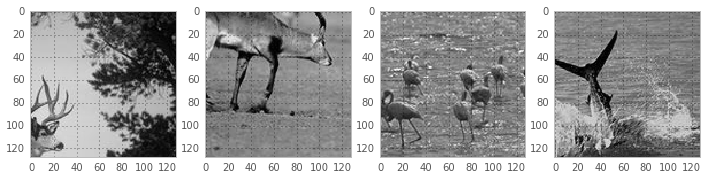

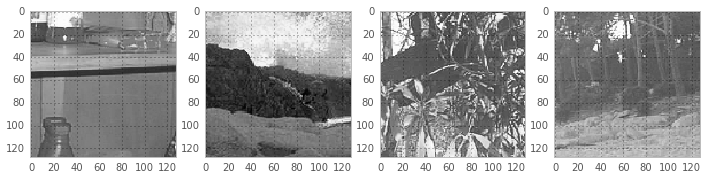

In [9]:
axs = []
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False})
im.pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
for name_database in ['serre07_targets', 'serre07_distractors']:
    fig = plt.figure(figsize=figsize)
    for _ in range(4):
        image, filename, croparea = im.patch(name_database, )
        axs.append(fig.add_subplot(1, 4, _))
        axs[-1].imshow(im.normalize(image, center=True, use_max=True), **opts)
    fig.show()

## Handling a database

In [10]:
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False, 'N_image':10})
im.pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
print(im.make_imagelist.__doc__)
# extract one image list from a database
imagelist = im.make_imagelist('serre07_targets')
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])


        Makes a list of images with no repetition.

        Takes as an input the name of a database (the name of a folder in the `datapath``),
        returns a list of the filenames along with the crop area.

        
Number of images: 10
First image: ['H_N112073.jpg', [90, 218, 4, 132]]


In [11]:
print(im.get_imagelist.__doc__)
im.pe.figpath, im.pe.matpath = '/tmp/fig', '/tmp/mat'
# store one image list from a database
imagelist = im.get_imagelist('classifier', 'serre07_targets')
!ls -l /tmp/mat
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])


        returns an imagelist from a pickled database.

        If the stored imagelist does not exist, creates it.
        The ``exp`` sting allows to tag the list to a particular experiment.

        
total 4
-rw-r--r-- 1 lolo wheel 384 May 20 23:25 classifier_serre07_targets_images.pickle
Number of images: 10
First image: ['M_N42048.jpg', [7, 135, 42, 170]]


In [12]:
im = Image({'N_X':128, 'N_Y':128, 'seed':None, 'do_mask':False, 'N_image':10})
im.pe.figpath, im.pe.matpath = '/tmp/fig', '/tmp/mat'
# now we can access again this stored list
!ls -l /tmp/mat
imagelist = im.get_imagelist('classifier', 'serre07_targets')
print('Number of images:', len(imagelist))
print('First image:', imagelist[0])

total 4
-rw-r--r-- 1 lolo wheel 384 May 20 23:25 classifier_serre07_targets_images.pickle
Number of images: 10
First image: ['M_N42048.jpg', [7, 135, 42, 170]]


## checking basic translation mechanism

defining a reference test image; check the axis labels for a (x,y) translation

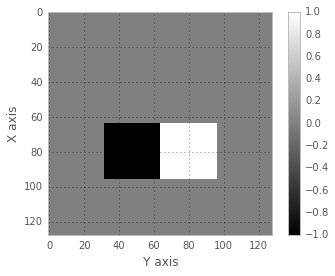

In [13]:
im = Image({'N_X':128, 'N_Y':128})
image = np.zeros((im.N_X, im.N_Y))
image[im.N_X/2:im.N_X/2+im.N_X/4, im.N_X/2:im.N_X/2+im.N_X/4] = 1 # white square on the right
image[im.N_X/2:im.N_X/2+im.N_X/4, im.N_X/4:im.N_X/2] = -1  # black square on the left
plt.imshow(image, **opts)
plt.ylabel('X axis')
plt.xlabel('Y axis')
plt.colorbar()

translating the image by an integer by rolling indices


16.0 32.0


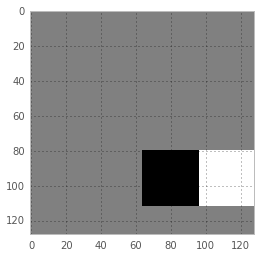

In [14]:
print(im.N_X/8., im.N_Y/4.)
plt.imshow(np.roll(np.roll(image, np.int(im.N_X/8.), axis=0), np.int(im.N_X/4.), axis=1), **opts)

(remember axis of imshow shox x going down, y going right)

translating the image down

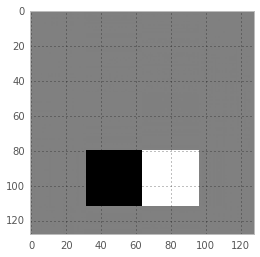

In [15]:
plt.imshow(im.translate(image, [im.N_X/8., 0.]), **opts)

translating the image right

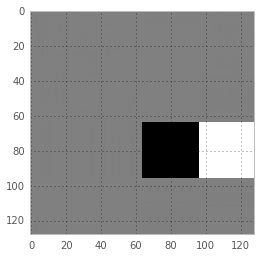

In [16]:
plt.imshow(im.translate(image, [0., im.N_Y/4.]), **opts)

translating the image on both axis

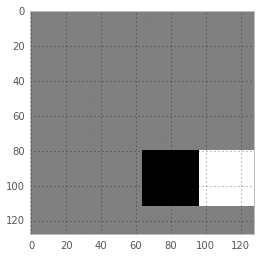

In [17]:
plt.imshow(im.translate(image, [im.N_X/8., im.N_Y/4.]), **opts)

translating the image over the torus

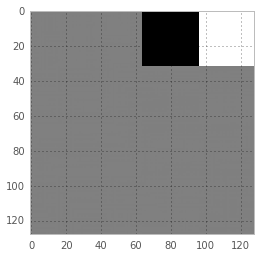

In [18]:
plt.imshow(im.translate(image, [im.N_X/2., im.N_Y/4.]), **opts)

[Back to top](#SLIP)

## some checks that should produce gray images (= null error)

null translation gives the same image

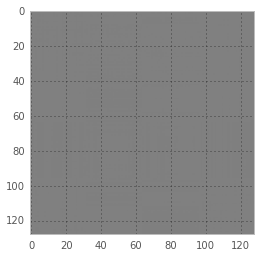

In [19]:
plt.imshow(image - im.translate(image, [0., 0.]), **opts)

the lg.translate function is invertible

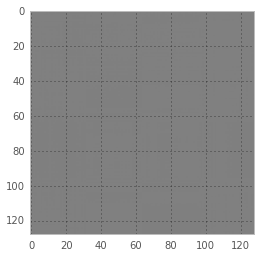

In [20]:
plt.imshow(image - im.translate(im.translate(image, [1.64, -2.233]), [-1.64, 2.233]), **opts)
#plt.colorbar()

also true for bigger translations  (we separate integer part from fractional part in the translation)

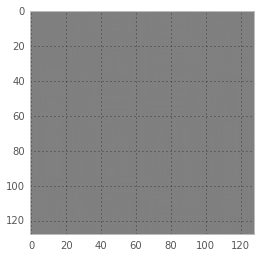

In [21]:
plt.imshow(image - im.translate(im.translate(image, [182.64, -286.233]), [-182.64, 286.233], preshift=True), **opts)

but not always true when we don't separate

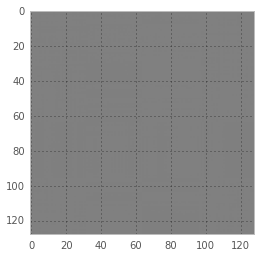

In [22]:
plt.imshow(image - im.translate(im.translate(image, [182.64, -286.233]), [-182.64, 286.233], preshift=False), **opts)

the lg.translate function is periodic

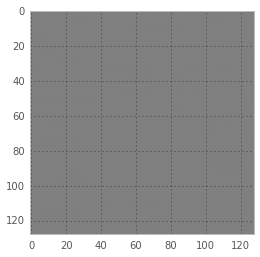

In [23]:
plt.imshow(image - im.translate(image, [-45*im.N_X, 5*im.N_Y]), **opts)

lg.translate function is associative

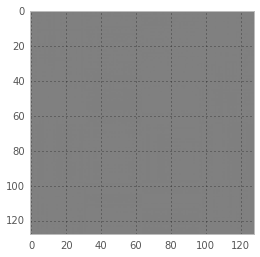

In [24]:
plt.imshow(im.translate(image, [1., .0]) - im.translate(im.translate(image, [.5, .0]), [.5, .0]), **opts)

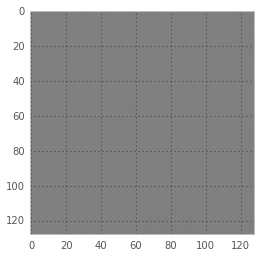

In [25]:
plt.imshow(im.translate(image, [2., .0]) - im.translate(im.translate(image, [1.5, -1.0]), [.5, 1.0]), **opts)

## filtering

TODO

## whitening

TODO

Using image  F_N173011.jpg


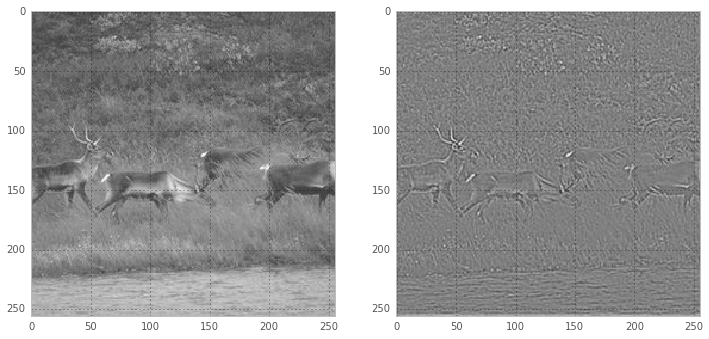

Using image  F_ani22.jpg


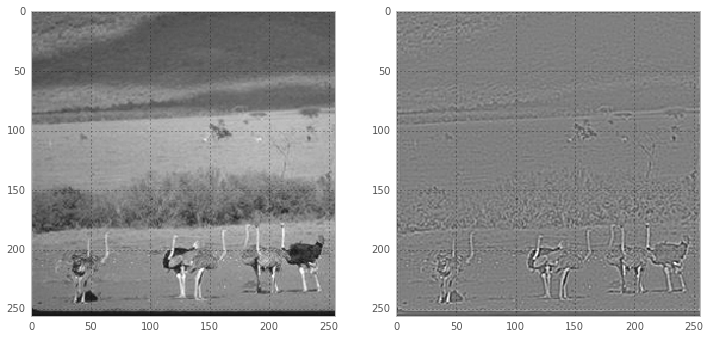

Using image  F_N43036.jpg


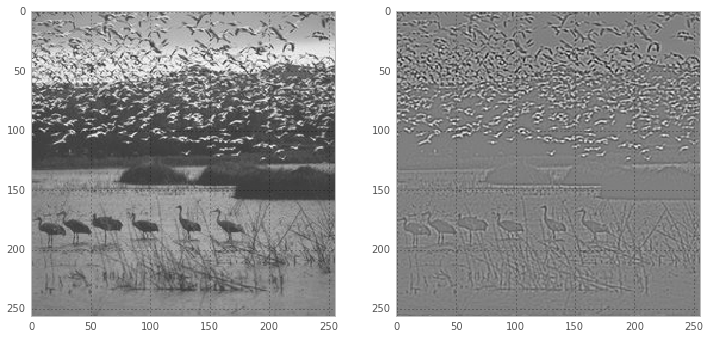

Using image  M_N100095.jpg


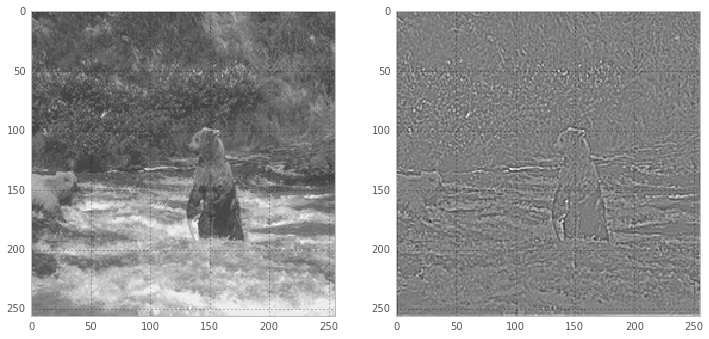

Using image  Bdn_natu419.jpg


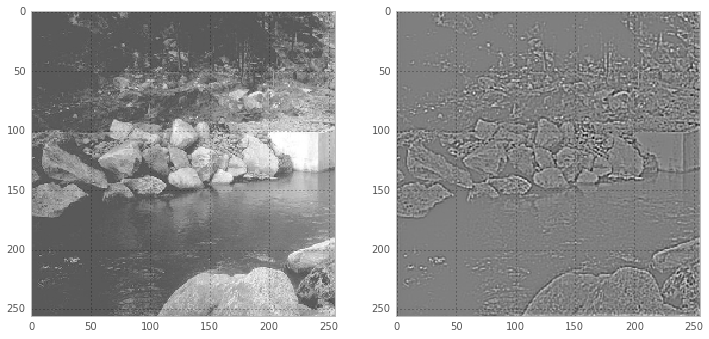

Using image  Hda_obj396.jpg


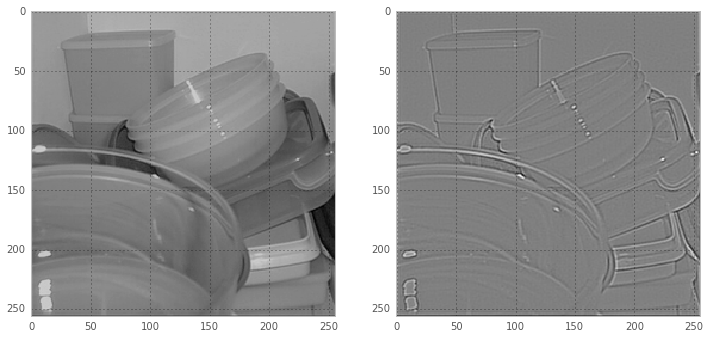

Using image  Bda_art1155.jpg


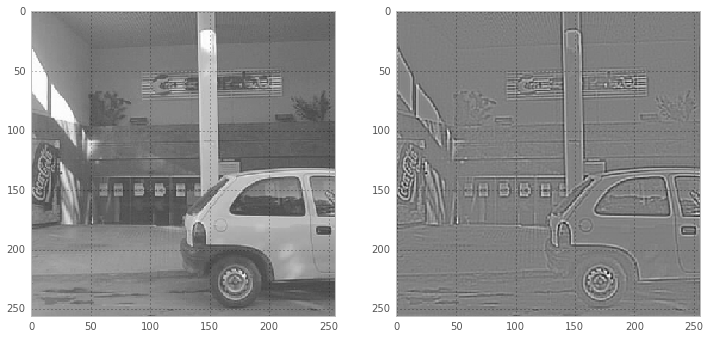

Using image  Bda_room28.jpg


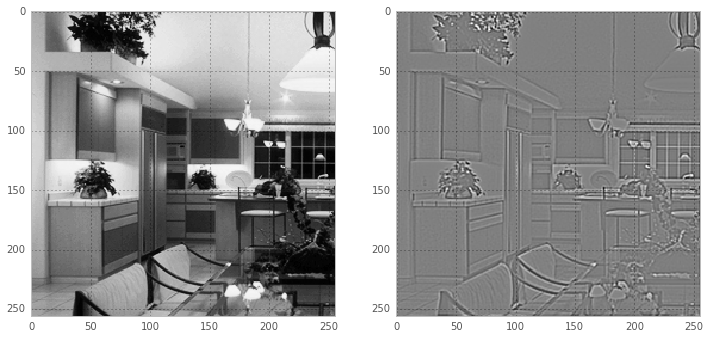

In [26]:
axs = []
im = Image('default_param.py')
im.pe.datapath = '/Users/lolo/pool/science/PerrinetBednar15/database/'
for name_database in ['serre07_targets', 'serre07_distractors']:
    for _ in range(4):
        fig = plt.figure(figsize=figsize)
        image, filename, croparea = im.patch(name_database, )
        axs.append(fig.add_subplot(1, 2, 1))
        axs[-1].imshow(im.normalize(image, center=True, use_max=True), **opts)
        axs.append(fig.add_subplot(1, 2, 2))
        axs[-1].imshow(im.normalize(im.whitening(image), center=True, use_max=True), **opts)
        plt.show()